In [15]:
import h3

from shapely.geometry import Point,Polygon

import contextily as ctx

import geopandas as gpd

from matplotlib import pyplot as plt

In [28]:
city_buff =  { 
                   'ekb': Point( 60.597465, 56.838011).buffer(0.2).boundary.coords, # ekb 
                   'rostov': Point(39.720349, 47.222078).buffer(0.15).boundary.coords, # rostov
                   'nn': Point(43.877701, 56.294612).buffer(0.2).boundary.coords, #nizniy
                   'kazan':Point( 49.106405, 55.796127).buffer(0.2).boundary.coords, #  kazan 
                   'sbp': Point(59.939095, 30.315868).buffer(0.25).boundary.coords,#spb
                   'novosib': Point( 82.920430, 55.030199).buffer(0.2).boundary.coords,
                   'sochi': Point(39.723089, 43.585472).buffer(0.3).boundary.coords,
                   'krasnodar': Point( 38.975313, 45.035470).buffer(0.2).boundary.coords
                   
               }

In [19]:
def get_h3 (city_boarders):
    boarders_gjson= { 
                "type": "Polygon",
                "coordinates": [
                   city_boarders
                ] 
            }

    # boarders = shape( { "type": "Polygon", "crs":"epsg=4326", "coordinates": [new_coords]})


    hexs = h3.polyfill(boarders_gjson, res=9,geo_json_conformant = True)

    polygonise = lambda hex_id: Polygon(
                            h3.h3_to_geo_boundary(
                            hex_id, geo_json=True)
                                        )

    # %time all_polys = gpd.GeoSeries(list(map(polygonise, hexs)), \
    #                                       index=hexs, \
    #                                       crs="EPSG:4326" \
    #                                      )

    gdf_hex = gpd.GeoDataFrame(list(map(polygonise, hexs)), \
                                          index=hexs, \
                                          crs="EPSG:4326", \
                     columns=['geometry']
                                         )
    fig, ax=plt.subplots(figsize=(13,10))
    gdf_hex.plot(alpha=0.5, linewidth=1, ax=ax)
    ctx.add_basemap(ax=ax, crs='epsg:4326')
    plt.show()
    return gdf_hex

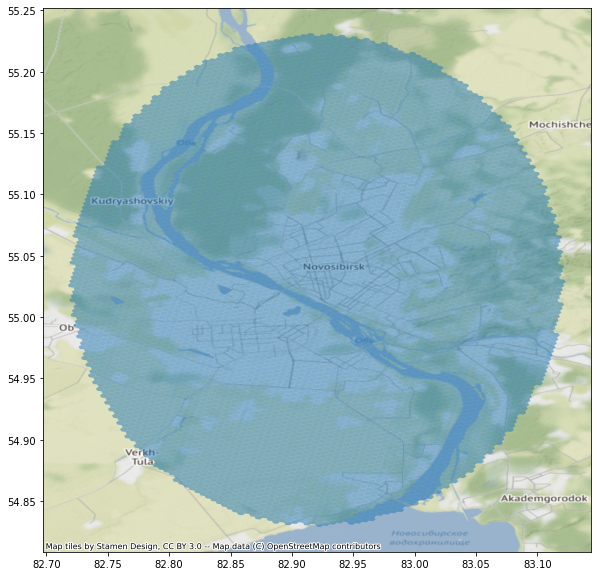

In [22]:
h3_novosib = get_h3(city_buff['novosib'])

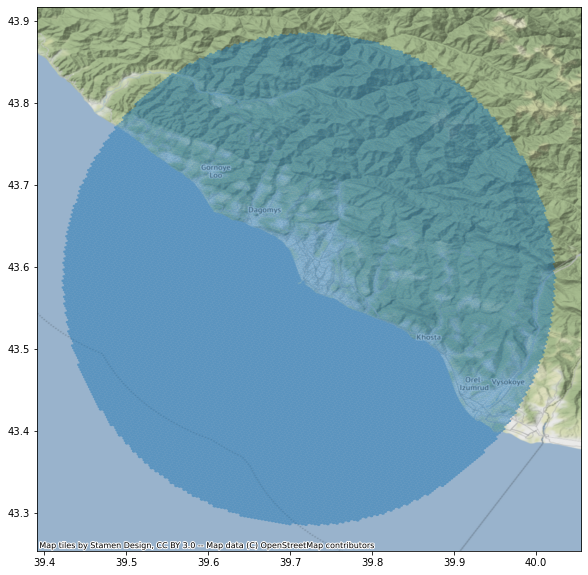

In [29]:
h3_sochi = get_h3(city_buff['sochi'])

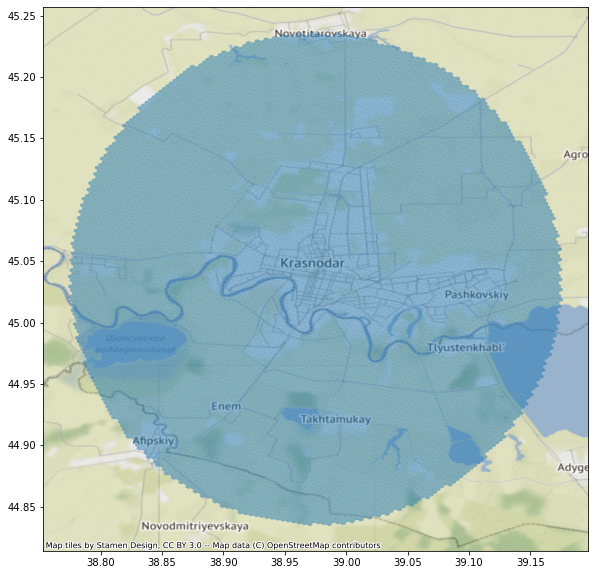

In [24]:
h3_krasnodar = get_h3(city_buff['krasnodar'])

In [26]:
h3_novosib.to_file('h3_novosib.geojson')

In [27]:
h3_krasnodar.to_file('h3_krasnodar.geojson')

In [30]:
h3_sochi.to_file('h3_sochi.geojson')